### Disclaimer


Nós separamos as abordagens em dois notebooks para manter a ordem e a limpeza dos arquivos. Este notebook foca na implementação prática, enquanto o `Discussões.ipynb` aborda as razões e considerações teóricas por trás das escolhas dos algoritmos e lógicas implementadas em `functions.py`.

## O Problema do Caminho Mais Curto
Em um grafo ponderado, cada aresta tem um peso ou custo associado, representando a "distância" entre dois nós (vértices). O objetivo é determinar a sequência de nós (caminho) que minimiza a soma dos pesos das arestas percorridas, partindo de um nó inicial até um nó final, visitando todos os nós e retornando ao ponto de partida. Este problema é desafiador porque o número de possíveis caminhos cresce exponencialmente conforme o número de nós, que quanto maior a escala mais difícil se torna a busca.

## Função do Algoritmo Genético nesta tarefa

Os algoritmos genéticos são utilizados como métodos de otimização e são inspirados no processo de seleção natural. São úteis para resolver problemas complexos onde a busca exaustiva (ex: busca em grade) e muito custosa computacionalmente. Vários espécies de opções podem ser usadas para isso. Portanto, o algoritmo genético apresentado neste código foi desenhado para resolver problemas de caminhos em grafos, para encontrar o caminho de menor distância entre dois vértices em um grafo. A seguir, falaremos sobre nossa hipótese e implementação.

No contexto do problema do caminho mais curto, cada solução potencial, ou indivíduo, é representada como um cromossomo, sendo uma sequência de distâncias entre nós. Inicialmente, uma população de soluções é gerada aleatoriamente, com cada indivíduo representando um caminho possível. Cada caminho é avaliado usando uma função fitness, onde caminhos mais curtos têm valores de aptidão melhores. Os melhores indivíduos são selecionados para reprodução com base em suas aptidões, utilizando  o método de seleção por torneio. Novos indivíduos são gerados combinando partes dos pais, no cruzamento. Para introduzir variação, algumas partes dos indivíduos são alteradas aleatoriamente, como trocando caminhos. Os novos indivíduos substituem parte ou toda a população atual, repetindo o processo por algumas gerações.

## Pergunta que queremos responder

**É possível otimizar caminho de forma a ele encontrar o caminho mais curto com algoritmos genéticos?**

**Funções e importações:**

In [21]:
from functools import partial

In [22]:
#importando funções
from functions import generate_graph_from_path as constroi_grafo
from functions import show_neighbors as mostra_vizinhos
from functions import calculate_path_distance as tamanho_caminho
from functions import plot_graph as mostra_grafo
from functions import populacao_de_caminhos as gerar_populacao
from functions import selecao_torneio_min as funcao_selecao
from functions import funcao_objetivo_grafo as funcao_objetivo
from functions import mutacao_troca as funcao_mutacao
from functions import cruzamento_cruzado as funcao_cruzamento

**Hiperparâmetros editáveis:**

In [23]:
# Definindo vértice inicial e final
start_vertex = 'A'
end_vertex = 'B'
NUM_VERTICES = 10  # Número de vértices desejado
TAMANHO_DA_POPULACAO = 10 
TAMANHO_TORNEIO = 3
NUM_GERACOES = 10
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.2

**Grafo aleatório:**

{'A': {'1': 8, '4': 2, '5': 6, '6': 7, '8': 8}, '1': {'2': 4, '8': 6, '4': 4, '6': 5}, '2': {'3': 2, '5': 7, '6': 10, '8': 1}, '3': {'4': 4, '2': 2, '5': 3, '6': 1, '8': 10}, '4': {'5': 8, '1': 4, 'A': 2, '7': 10, '6': 6, '8': 10}, '5': {'6': 5, '2': 7, '7': 1, '8': 2, '4': 8, 'A': 6, '3': 3}, '6': {'7': 4, '2': 10, '5': 5, 'B': 1, '4': 6, '8': 6, 'A': 7, '3': 1, '1': 5}, '7': {'8': 5, '4': 10, '5': 1, '6': 4, 'B': 6}, '8': {'B': 3, '1': 6, '5': 2, '6': 6, '3': 10, '4': 10, 'A': 8, '2': 1, '7': 5}, 'B': {'6': 1, '7': 6}}


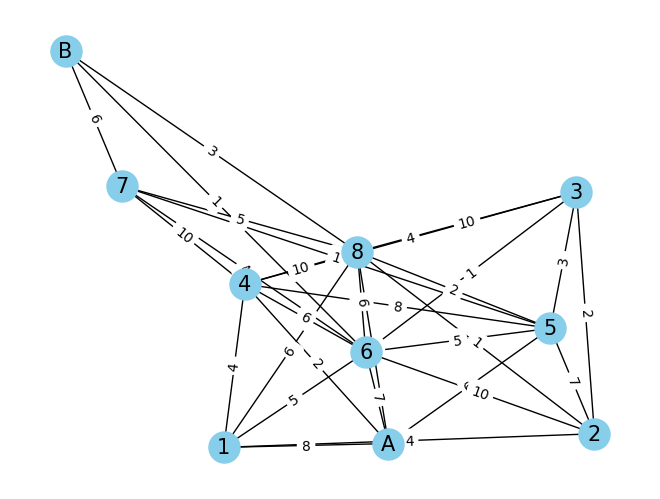

Vertices do grafo['A', '1', '2', '3', '4', '5', '6', '7', '8', 'B']


In [24]:
# Cria o grafo com o número de vértices desejado
graph, path_vertices = constroi_grafo(NUM_VERTICES)

# Plota o grafo
mostra_grafo(graph)

print(f'Vertices do grafo{path_vertices}')

**Nota:** Esse grafo simula diversos caminhos entre dois pontos arbitrários (A e B), com distâncias aleatórias. portanto, não há caminhos que não levam ao ponto B ou becos sem saída, visto que nosso objetivo é o caminho com a menor distância.

In [25]:
populacao = gerar_populacao(graph, start_vertex, end_vertex, TAMANHO_DA_POPULACAO)

In [26]:
populacao

[['A', '8', 'B'],
 ['A', '4', '7', 'B'],
 ['A', '5', '4', '3', '5', '8', 'B'],
 ['A', '5', '2', '1', '6', 'B'],
 ['A', '1', '2', '5', '8', 'B'],
 ['A', '5', '7', 'B'],
 ['A', '4', '8', 'B'],
 ['A', '4', '8', 'B'],
 ['A', '1', '4', 'A', '5', '3', '4', '7', 'B'],
 ['A', '1', '8', 'B']]

**Nota:**: Essa é a população gerada aleatoriamente.

In [27]:
funcao_objetivo = partial(funcao_objetivo, G=graph)

**Nota:** Essa linha de código usa functools.partial para criar uma nova função funcao_objetivo com o argumento G fixado como graph (o grafo gerado).

In [28]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao(graph, proxima_geracao, CHANCE_MUTACAO, end_vertex)
    
    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao

**1.** `fitness = funcao_objetivo(proxima_geracao):` Calcula o fitness para todos os indivíduos na próxima geração (proxima_geracao) usando a função objetivo (funcao_objetivo).

**2.** `menor_fitness = min(fitness):` Encontra o menor valor de fitness na lista fitness, indicando o melhor desempenho encontrado na geração atual.

**3.** `indice = fitness.index(menor_fitness):` Obtém o índice do menor fitness na lista fitness.

**4.** `hall_da_fama.append(proxima_geracao[indice]):` Adiciona o indivíduo com menor fitness encontrado na geração atual ao hall_da_fama, armazena os melhores indivíduos ao longo das gerações.

In [29]:
populacao

[['A', '5', '7', 'B'],
 ['A', '5', '7', 'B'],
 ['A', '5', '7', 'B'],
 ['A', '5', '7', 'B'],
 ['A', '5', '7', 'B'],
 ['A', '5', '7', 'B'],
 ['A', '5', '7', 'B'],
 ['A', '5', '7', 'B'],
 ['A', '5', '7', 'B'],
 ['A', '5', '7', 'B']]

**Nota:** Indíviduos após a seleção de várias gerações.

In [30]:
fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia_min = tamanho_caminho(graph, melhor_individuo_observado)

print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia_min)

Melhor individuo obtido por algoritmos genéticos:
['A', '5', '7', 'B'] com distância: 13


## Conclusão

Com isso, concluímos que os resultados mostraram que o algoritmo genético foi capaz de encontrar solução excelente. O AG convergiu para trajetórias com distâncias mínimas em múltiplas tentaivas, demonstrando que é eficaz na resolução do problema de caminhos mais curtos em grafos.